<a href="https://colab.research.google.com/github/oburckard/PFE/blob/master/PFE_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Constantes
N = 9
g = 9.8 #gravité, 9,8m/s
temps = 20

# Valeurs des pas
dt = 0.5 #l'intervalle entre 2 temps, on le prend à 0.5 sec
dx = 1/(N+1) 
dy = 1/(N+1)
dt2 = dt*dt
dx2 = dx*dx
dy2 = dy*dy
dt2dx2 = dt2/dx2
dt2dy2 = dt2/dy2

#On appelle U les approximations de U(xi,yj,tn) 
U = np.zeros((N+1,N+1,temps))

#On appelle h la profondeur 
# Initialisation de la profondeur h(xi,yj) (=1 partout dans un premier temps)
h = 1+np.zeros((N+1,N+1))
h[2,2]=4





t=: 0


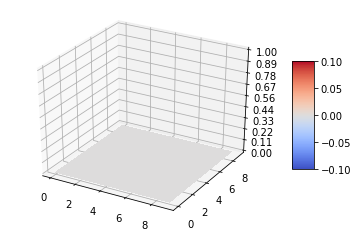

t=: 1


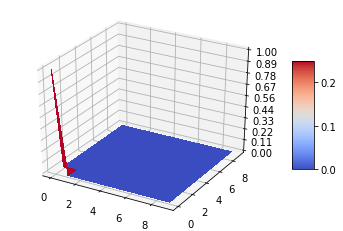

t=: 2


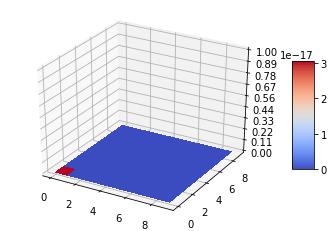

t=: 3


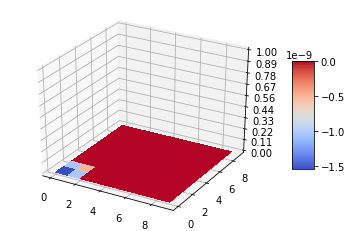

t=: 4


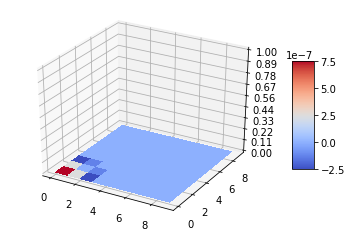

t=: 5


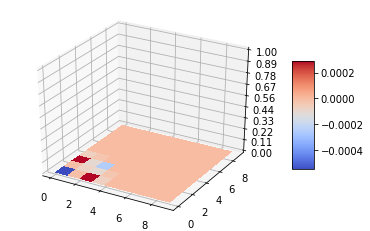

t=: 6


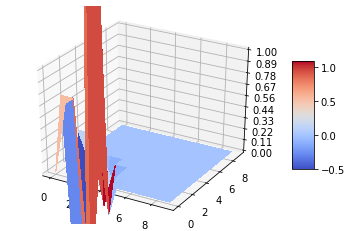

t=: 7


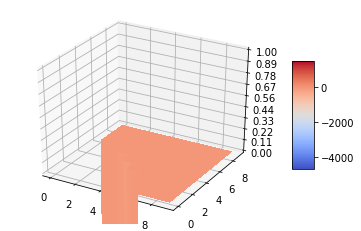

t=: 8


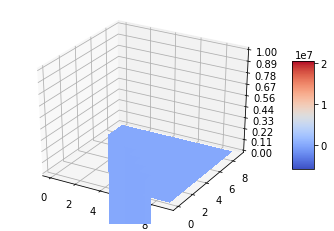

t=: 9


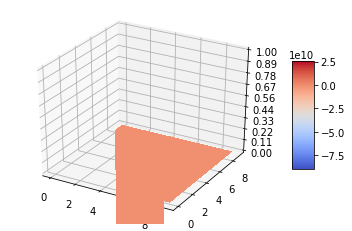

t=: 10


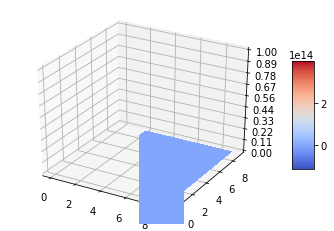

t=: 11


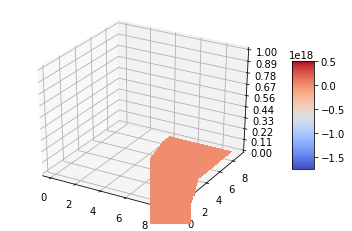

t=: 12


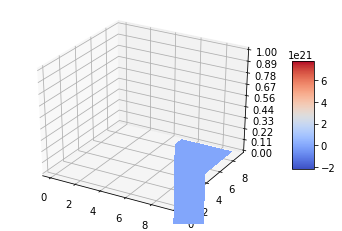

t=: 13


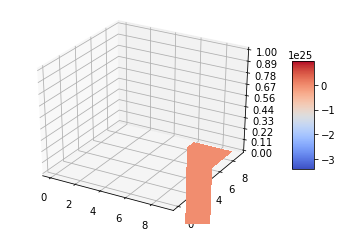

t=: 14


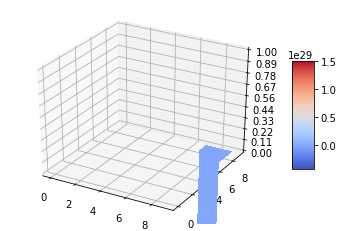

t=: 15


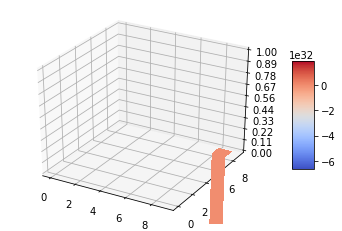

t=: 16


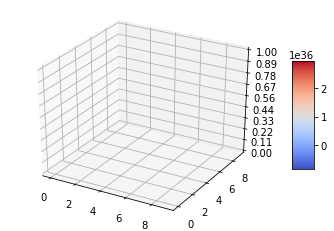

t=: 17


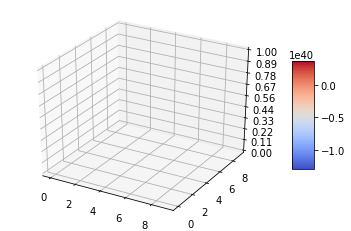

t=: 18


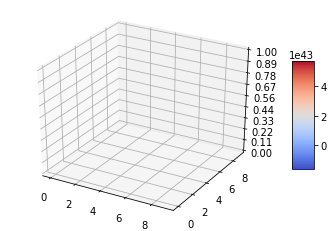

t=: 19


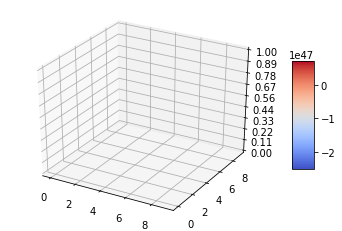

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


K = np.zeros((N+1,N+1))
Z = np.zeros((N+1,N+1))
UU = np.zeros((N+1,N+1))

#Représentation du tsunami à différents temps
for t in range(0,temps,1):

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(0, N+1, 1)
    Y = np.arange(0, N+1, 1)
    X, Y = np.meshgrid(X, Y)
 
    # Fonction source : exp(-10(x^2+y^2))*sin(pi*t) si t dans [0,1[, 0 sinon
    # Permet d'initialiser U0 et U1
    tp=t/2 #pour avoir des temps toutes les 0,5 secs
    if t<3:
      for i in range(0,N+1,1):
        for j in range(0,N+1,1):
          Z[i,j]=np.exp(-10*(i**2+j**2))*np.sin(np.pi*tp)
          U[i,j,t]=Z[i,j]
      

    if 2<t<temps :
      for i in range(1,N,1):
        for j in range(1,N,1):
          U[i,j,t] = -U[i,j,t-2]+2*U[i,j,t-1]*(1-g*h[i,j]*(dt2dx2+dt2dy2))
          U[i,j,t] = U[i,j,t]+U[i+1,j,t-1]*(g*h[i,j]*dt2dx2+g*dt2dx2/4*(h[i+1,j]-h[i-1,j]))+U[i-1,j,t-1]*(g*h[i,j]*dt2dx2-g*dt2dx2/4*(h[i+1,j]-h[i-1,j]))
          U[i,j,t] = U[i,j,t]+U[i,j+1,t-1]*(g*h[i,j]*dt2dy2+g*dt2dy2/4*(h[i,j+1]-h[i,j-1]))+U[i,j-1,t-1]*(g*h[i,j]*dt2dy2-g*dt2dy2/4*(h[i,j+1]-h[i,j-1]))
          Z[i,j] = U[i,j,t]
      #Conditions aux limites
      i=0
      for j in range(1,N,1):
        U[i,j,t]= U[i+1,j,t]
        Z[i,j] = U[i,j,t]
      i=N
      for j in range(1,N,1):
        U[i,j,t]= U[i-1,j,t] 
        Z[i,j] = U[i,j,t] 
      j=0
      for i in range(1,N,1):
        U[i,j,t]=U[i,j+1,t]
        Z[i,j] = U[i,j,t]
      j=N
      for i in range(1,N,1):
        U[i,j,t]=U[i,j-1,t]
        Z[i,j] = U[i,j,t]
      U[0,0,t]=U[1,1,t]
      U[0,N,t]=U[1,N-1,t]
      U[N,0,t]=U[N-1,1,t]
      U[N,N,t]=U[N-1,N-1,t]
    

    # Pour afficher la surface
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

    # Pour "choisir" les valeurs de l'axe des z affichées
    ax.set_zlim(0, 1)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Légende des couleurs avec leurs valeurs
    fig.colorbar(surf, shrink=0.5, aspect=5)
    print('t=:',t)
    plt.show()
   